In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data_path = r"/Users/AdamHarris/Desktop/ShapeData/Images"
list = os.listdir(data_path) 
num_samples = np.size(list)
print(num_samples)
list.sort()

10000


In [3]:
labels = np.loadtxt('/Users/AdamHarris/Desktop/ShapeData/labels.csv', delimiter=',', skiprows=0)
labels = labels.astype(np.uint8)
print(labels)
print(len(labels))

[23  7 20 ... 16 11 17]
10000


In [4]:
im = Image.open(data_path + '/' + list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(list)
print(m, n, num_images)

500 500 10000


In [5]:
images = np.array([np.array(Image.open(data_path + '/' + fname)) for fname in list])

In [6]:
print(images.shape)

(10000, 500, 500)


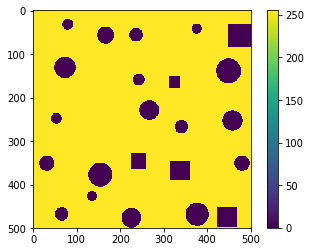

In [7]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [9]:
x_test = x_test / 255.0
x_train = x_train / 255.0

<function matplotlib.pyplot.show(*args, **kw)>

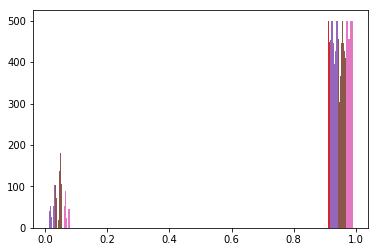

In [10]:
plt.hist(x_train[0])
plt.show

In [11]:
class_names = ['Zero Shapes', 'One Shape', 'Two Shapes', 'Three Shapes', 'Four Shapes', 
               'Five Shapes', 'Six Shapes', 'Seven Shapes', 'Eight Shapes', 'Nine Shapes',
               'Ten Shapes', 'Eleven Shapes', 'Twelve Shapes', 'Thirteen Shapes', 
               'Fourteen Shapes', 'Fifteen Shapes', 'Sixteen Shapes', 'Seventeen Shapes', 
               'Eighteen Shapes', 'Nineteen Shapes', 'Twenty Shapes', 'Twenty-one Shapes',
               'Twenty-two Shapes', 'Twenty-three Shapes', 'Twenty-four Shapes', 'Twenty-five Shapes']

0
25


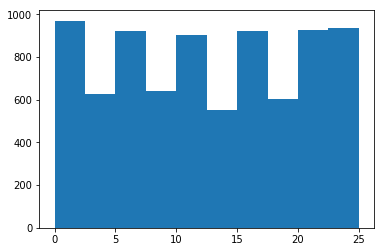

In [12]:
plt.hist(y_train)
print(min(y_train))
print(max(y_train))

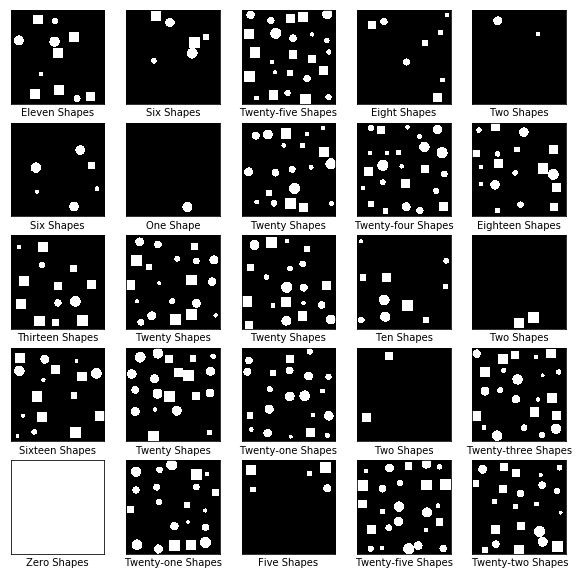

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(m,n)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(26, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
8000/8000 [==============================] - 172s 21ms/sample - loss: 15.3856 - acc: 0.0424
Epoch 2/10
8000/8000 [==============================] - 155s 19ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 3/10
8000/8000 [==============================] - 157s 20ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 4/10
8000/8000 [==============================] - 153s 19ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 5/10
8000/8000 [==============================] - 155s 19ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 6/10
8000/8000 [==============================] - 153s 19ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 7/10
8000/8000 [==============================] - 152s 19ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 8/10
8000/8000 [==============================] - 158s 20ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 9/10
8000/8000 [==============================] - 149s 19ms/sample - loss: 15.4311 - acc: 0.0426
Epoch 10/10
8000/8000 [==============================] - 168s 21ms/sample

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)

2000/2000 [==============================] - 18s 9ms/sample - loss: 15.5540 - acc: 0.0350
